# Telecom Stocks Analysis

## Project Overview
This project analyses the stock performance of three major telecom companies: AT&T(T), T-Mobile (TMUS), and Verizon (VZ) over a one-year period. The analysis includes trend analysis, volatility assessment, correlation studies, and performance comparisons to provide insights for potential investors.

## Data Source
The data used in this analysis is sourced from Python with the yfinance library.
This library allows you to easily download historical market data from Yahoo
Finance, which covers NASDAQ listed companies.
This data contains daily trading information including opening, closing, high, and low prices, as well as trading volume for each

By: Yara , Hunter, Adolphus, Sanjana, Kowsar  company.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
from scipy.stats import linregress
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
from datetime import datetime, timedelta 

In [6]:
# Define the ticker symbols
tickers = ['T', 'TMUS', 'VZ']

# Set the start and end dates
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=1)

# Create an empty dictionary to store data
data = {}

# Fetch the data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Convert the dictionary to a DataFrame
df = pd.concat(data, axis=1)


# Optionally, save the data to a CSV file
df.to_csv('cell_phone_companies_trading_data.csv')

# Display the dataFrame
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


T                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-08-04  14.050000  14.110000  14.000000  14.000000  13.102561  38878700   
2023-08-07  14.010000  14.090000  13.890000  14.010000  13.111920  38109900   
2023-08-08  13.940000  14.200000  13.940000  14.180000  13.271023  39075100   
2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355254  33951700   
2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400   
...               ...        ...        ...        ...        ...       ...   
2024-07-29  19.000000  19.020000  18.820000  18.900000  18.900000  30788300   
2024-07-30  18.950001  19.030001  18.840000  18.980000  18.980000  27855000   
2024-07-31  18.900000  19.320000  18.879999  19.250000  19.250000  39522000   
2024-08-01  19.309999  19.629999  19.129999  19.469999  19.469999  44379300   
2024-08-02  19.639999  19.990000  19.190001  19.370001  19.370001  45231100   

                  TMUS                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-08-04  135.789993  136.470001  134.460007  134.600006  132.974884   
2023-08-07  135.460007  137.179993  135.009995  136.649994  135.000137   
2023-08-08  136.490005  137.570007  136.190002  136.259995  134.614838   
2023-08-09  136.229996  138.360001  136.080002  137.710007  136.047348   
2023-08-10  138.649994  139.440002  137.580002  137.729996  136.067093   
...                ...         ...         ...         ...         ...   
2024-07-29  175.710007  177.029999  175.070007  176.869995  176.869995   
2024-07-30  177.589996  177.889999  173.740005  175.360001  175.360001   
2024-07-31  180.330002  182.750000  176.889999  182.279999  182.279999   
2024-08-01  181.869995  187.509995  181.820007  187.070007  187.070007   
2024-08-02  189.000000  193.770004  188.300003  188.759995  188.759995   

                            VZ                                              \
             Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2023-08-04  3255600  33.000000  33.029999  32.529999  32.619999  30.410435   
2023-08-07  3554400  32.650002  32.830002  32.180000  32.529999  30.326532   
2023-08-08  3242500  32.450001  32.810001  32.430000  32.570000  30.363823   
2023-08-09  4092900  32.509998  32.830002  32.340000  32.709999  30.494337   
2023-08-10  2492800  32.849998  33.320000  32.820000  33.020000  30.783342   
...             ...        ...        ...        ...        ...        ...   
2024-07-29  2400800  40.080002  40.119999  39.669998  40.029999  40.029999   
2024-07-30  4848100  40.009998  40.259998  39.830002  40.040001  40.040001   
2024-07-31  8036700  40.029999  40.790001  39.980000  40.520000  40.520000   
2024-08-01  5228400  40.669998  41.180000  40.279999  40.849998  40.849998   
2024-08-02  7922200  41.200001  41.939999  40.410000  40.970001  40.970001   

                      
              Volume  
Date                  
2023-08-04  24558300  
2023-08-07  24314000  
2023-08-08  22178900  
2023-08-09  20798500  
2023-08-10  19031600  
...              ...  
2024-07-29  12937200  
2024-07-30  16089200  
2024-07-31  23605400  
2024-08-01  18166800  
2024-08-02  26110300  

[251 rows x 18 columns]

In [7]:
# number of rows and columns
df.shape

(251, 18)

In [9]:
df.info

<bound method DataFrame.info of                     T                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-08-04  14.050000  14.110000  14.000000  14.000000  13.102561  38878700   
2023-08-07  14.010000  14.090000  13.890000  14.010000  13.111920  38109900   
2023-08-08  13.940000  14.200000  13.940000  14.180000  13.271023  39075100   
2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355254  33951700   
2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400   
...               ...        ...        ...        ...        ...       ...   
2024-07-29  19.000000  19.020000  18.820000  18.900000  18.900000  30788300   
2024-07-30  18.950001  19.030001  18.840000  18.980000  18.980000  27855000   
2024-07-31  18.900000  19.320000  18.879999  19.250000  19.250000  39522000   
2024-08-01  19.30999

In [11]:
# Load the data
df = pd.read_csv("cell_phone_companies_trading_data.csv", header=[0,1], index_col=0)
df.index = pd.to_datetime(df.index)

# Separate data for each company
companies = ['T', 'TMUS', 'VZ']
data = {company: df[company].copy() for company in companies}

# display data
data

{'T':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2023-08-04  14.050000  14.110000  14.000000  14.000000  13.102561  38878700
 2023-08-07  14.010000  14.090000  13.890000  14.010000  13.111920  38109900
 2023-08-08  13.940000  14.200000  13.940000  14.180000  13.271023  39075100
 2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355254  33951700
 2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400
 ...               ...        ...        ...        ...        ...       ...
 2024-07-29  19.000000  19.020000  18.820000  18.900000  18.900000  30788300
 2024-07-30  18.950001  19.030001  18.840000  18.980000  18.980000  27855000
 2024-07-31  18.900000  19.320000  18.879999  19.250000  19.250000  39522000
 2024-08-01  19.309999  19.629999  19.129999  19.469999  19.469999  44379300
 2024-08-02  19.639999  19.990000  19.190001  19.370001  19.370001  452

# Trend Analysis
   - A line plot showing the closing prices of all three stocks over the year.
   - This visualizes the overall price trends and allows for easy comparison between the companies



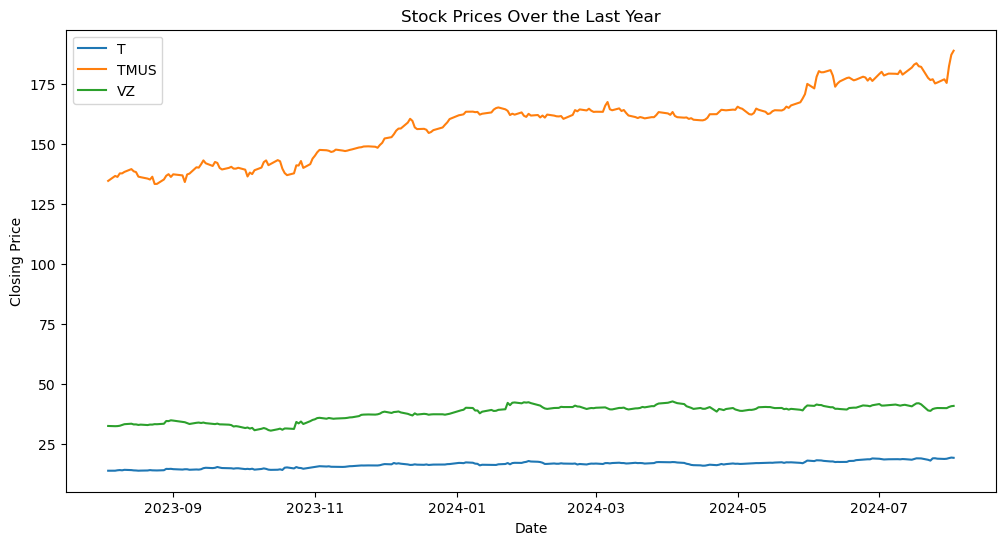

In [12]:
# Trend Analysis
plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(data[company]['Close'], label=company)
plt.title('Stock Prices Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# save to file
plt.savefig('stock_prices.png')


# Conclusion: 

# Moving Averages**
   - Calculation and visualization of 20-day moving averages for each stock. It takes a certain day and finds a trend     over 20 days. (takes 10 days before the day and 10 days after and calculates the average)
   - Helps in identifying short-term trends and smoothing out price fluctuations. (if there are any unusual jumps i     t will show



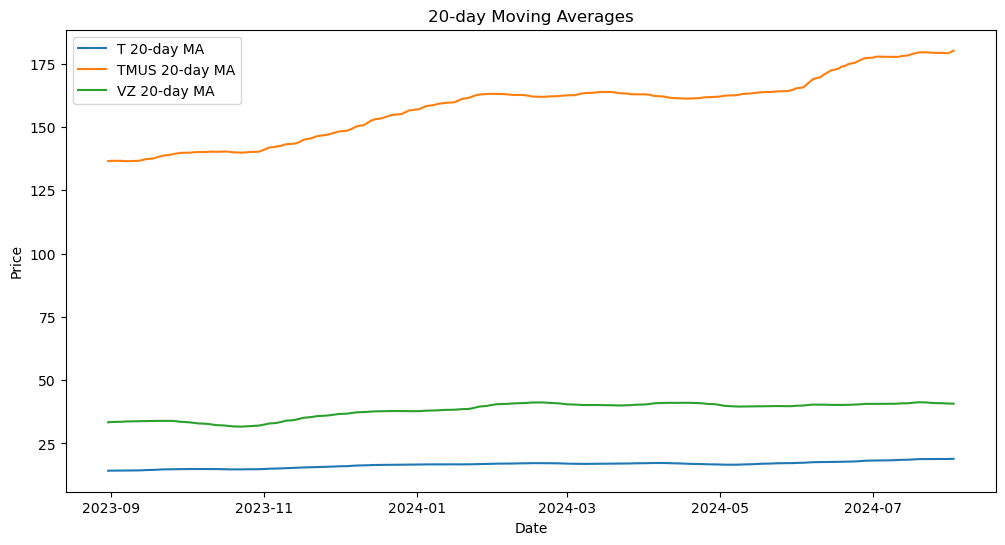

In [13]:
# Moving Averages plot


# Conclusion: 

# Daily Returns**
   - Calculation of daily returns for each stock. (The average change from one day to another. The percentage value is    between 0-1
   - Used in subsequent analyses for volatility and correlation.


In [34]:
# Show Daily Returns
for company in companies:
    data[company].loc[:, 'Daily_Return'] = data[company]['Close'].pct_change()

# print data with the new added column daily return 
print(data)

{'T':                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-08-04  14.050000  14.110000  14.000000  14.000000  13.102561  38878700   
2023-08-07  14.010000  14.090000  13.890000  14.010000  13.111920  38109900   
2023-08-08  13.940000  14.200000  13.940000  14.180000  13.271023  39075100   
2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355254  33951700   
2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400   
...               ...        ...        ...        ...        ...       ...   
2024-07-29  19.000000  19.020000  18.820000  18.900000  18.900000  30788300   
2024-07-30  18.950001  19.030001  18.840000  18.980000  18.980000  27855000   
2024-07-31  18.900000  19.320000  18.879999  19.250000  19.250000  39522000   
2024-08-01  19.309999  19.629999  19.129999  19.469999  19.469999  44379300   
2024-08-02  19.639999  19.990000  19.190001  1

In [ ]:
# Volatility Analysis**
   - Computation of annualized volatility for each stock.
   - Visualized using a bar plot to compare the relative risk of each stock
   - The change in stock. If the change gap is huge, it means that the stock is risky and not stable (this can be good for high-risk clients over a short period of time. If the Change is small, it’s more stable less risky stock)


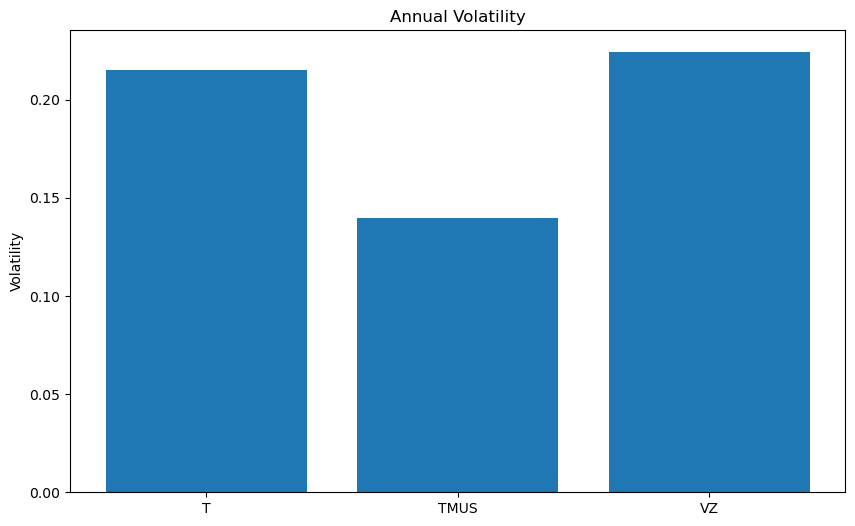

In [15]:
# Volatility
volatility = {company: data[company]['Daily_Return'].std() * np.sqrt(252) for company in companies}

# Plot Volatility


# Conclusion: 

# Correlation Analysis**
   - Calculation of correlation between the daily returns of the three stocks. (to measure the size of the stock with     the other companies)
   - Visualized using a heatmap to show the strength and direction of relationships between the stocks. (Same colour      and similar they are 100% matching stocks)


In [16]:
# Show Correlation Analysis
returns = pd.DataFrame({company: data[company]['Daily_Return'] for company in companies})
correlation = returns.corr()

returns

,T,TMUS,VZ
Date,,,
2023-08-04,NaN,NaN,NaN
2023-08-07,0.000714,0.015230,-0.002759
2023-08-08,0.012134,-0.002854,0.001230
2023-08-09,0.006347,0.010642,0.004298
2023-08-10,-0.007008,0.000145,0.009477
...,...,...,...
2024-07-29,-0.005786,0.007634,-0.001497
2024-07-30,0.004233,-0.008537,0.000250
2024-07-31,0.014226,0.039462,0.011988


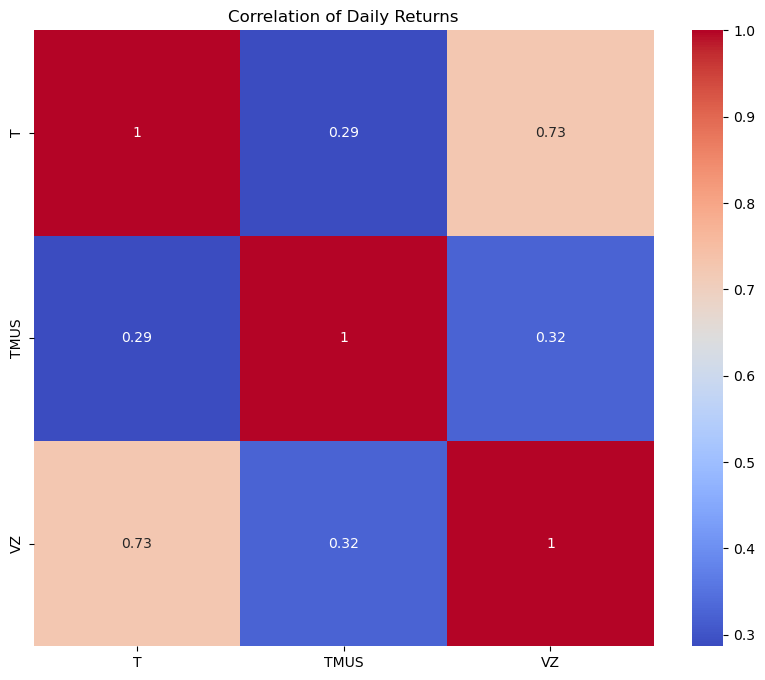

In [17]:
# plot heatmap correlation of daily returns


# Conclusion:

# Cumulative Returns
   - Calculation and visualization of cumulative returns for each stock. (Return is between 0-1 so we need to add 1 to    the return before calculating the cum to remove the decimal 
   - Provides insight into overall performance over the entire perio.



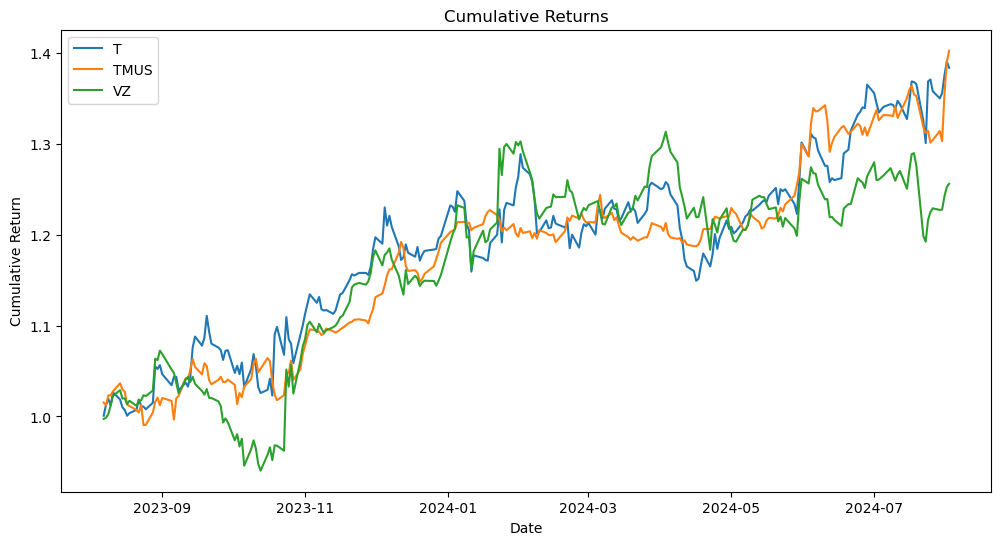

In [18]:
# calculate and plot Cumulative Returns
cum_returns = (1 + returns).cumprod()



# Conclusion: 

# Candlestick Charts
   - Creation of candlestick charts for each company. (This is one of the main Charts used to analyse stock market        data)
   - Offers a detailed view of daily price movements, including opening, closing, high, and low prices


In [19]:
# show plot_data for candelstick plot
for company in companies:
    # Prepare data for mplfinance
    plot_data = data[company].copy()

plot_data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2023-08-04,33.000000,33.029999,32.529999,32.619999,30.410435,24558300,NaN
2023-08-07,32.650002,32.830002,32.180000,32.529999,30.326532,24314000,-0.002759
2023-08-08,32.450001,32.810001,32.430000,32.570000,30.363823,22178900,0.001230
2023-08-09,32.509998,32.830002,32.340000,32.709999,30.494337,20798500,0.004298
2023-08-10,32.849998,33.320000,32.820000,33.020000,30.783342,19031600,0.009477
...,...,...,...,...,...,...,...
2024-07-29,40.080002,40.119999,39.669998,40.029999,40.029999,12937200,-0.001497
2024-07-30,40.009998,40.259998,39.830002,40.040001,40.040001,16089200,0.000250
2024-07-31,40.029999,40.790001,39.980000,40.520000,40.520000,23605400,0.011988


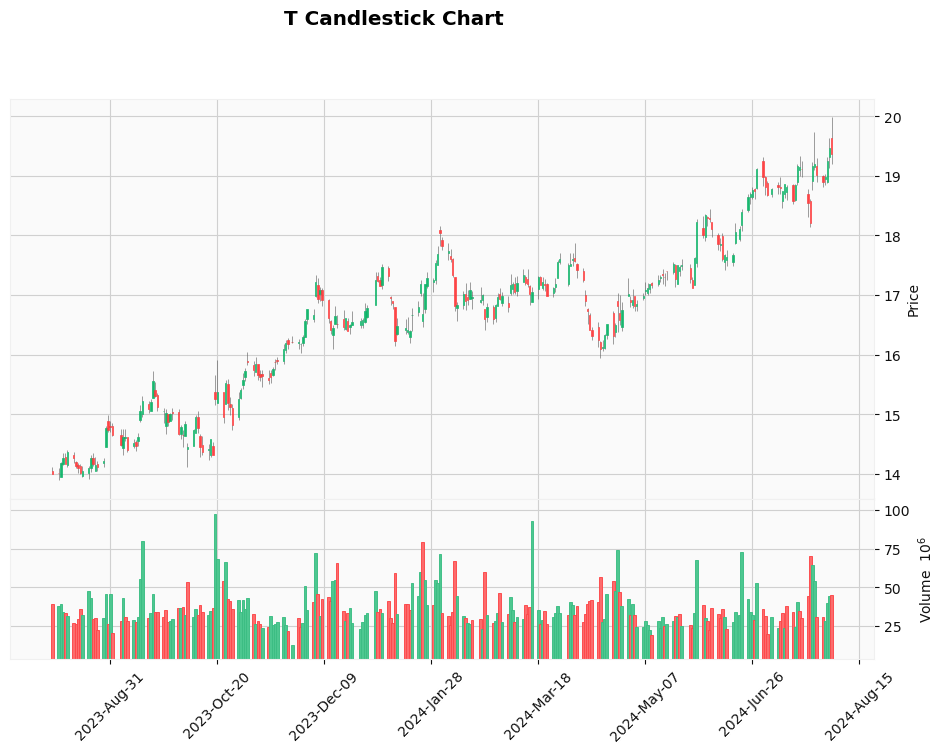

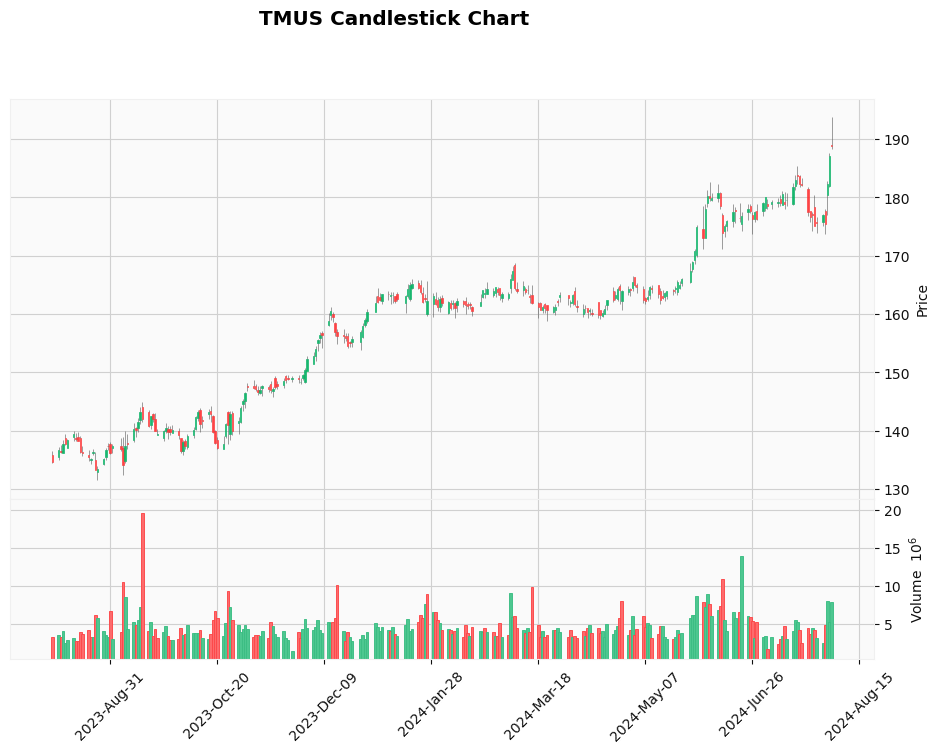

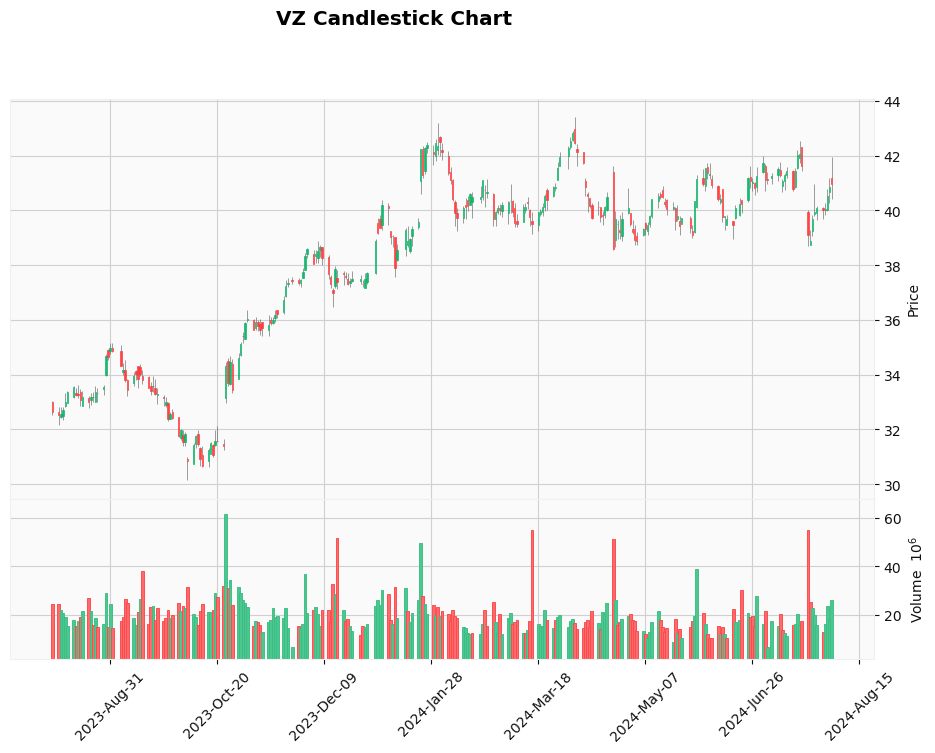

In [30]:
# Candlestick plots



# Conclusion: 

# Trading Volume Analysis
   - Visualization of trading volume over time for each stock.
   - Helps in understanding liquidity and investor interest



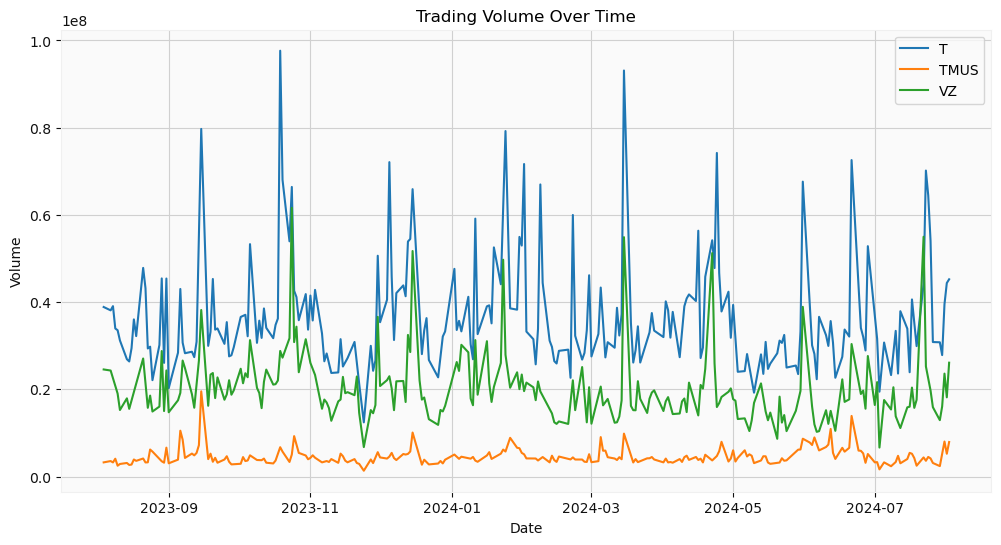

In [31]:
# plot Trading Volume Analysis


# Conclusion: 

# Summary Statistics
   - Compilation of key statistics including start price, end price, percent change, average      daily return, and       volatility.
   - Provides a quick overview of each stock's performance.


In [32]:
# Summary Statistics
summary = pd.DataFrame({
    company: {
        'Start Price': data[company]['Close'].iloc[0],
        'End Price': data[company]['Close'].iloc[-1],
        'Percent_Change': (data[company]['Close'].iloc[-1] / data[company]['Close'].iloc[0] - 1) * 100,
        'Average Daily Return': data[company]['Daily_Return'].mean() * 100,
        'Volatility': volatility[company] * 100,
    } for company in companies
})

print(summary)

                              T        TMUS         VZ
Start Price           14.000000  134.600006  32.619999
End Price             19.370001  188.759995  40.970001
Percent_Change        38.357149   40.237731  25.597801
Average Daily Return   0.139033    0.139217   0.101038
Volatility            21.511425   13.986295  22.413971


In [33]:
# Conclusion and Recommendations
print("\nConclusion and Recommendations:")
best_performer = 
lowest_volatility = 

print(f"Based on the analysis:")
print(f"1. {best_performer} has shown the highest price appreciation over the past year.")
print(f"2. {lowest_volatility} has the lowest volatility, suggesting it might be the most stable investment.")
print("3. Consider the correlation between stocks for diversification purposes.")
print("4. Monitor trading volumes for liquidity concerns.")
print("\nRecommendation: A balanced portfolio might include a mix of these stocks, with emphasis on")
print(f"{best_performer} for growth potential and {lowest_volatility} for stability. However, this")
print("should be considered in the context of the investor's risk tolerance and overall investment strategy.")


Conclusion and Recommendations:
Based on the analysis:
1. TMUS has shown the highest price appreciation over the past year.
2. TMUS has the lowest volatility, suggesting it might be the most stable investment.
3. Consider the correlation between stocks for diversification purposes.
4. Monitor trading volumes for liquidity concerns.

Recommendation: A balanced portfolio might include a mix of these stocks, with emphasis on
TMUS for growth potential and TMUS for stability. However, this
should be considered in the context of the investor's risk tolerance and overall investment strategy.


#  Key Findings: 

1. Best Performer: The analysis identifies the stock with the highest price appreciation over the year.
2. Lowest Volatility: The stock with the lowest volatility is highlighted, indicating potentially lower risk.
3. Correlation Insights: The correlation analysis reveals how the stocks move in relation to each other,
   which is crucial for portfolio diversification.
4. Volume Trends: The trading volume analysis provides insights into the liquidity of each sto .

## Recomme:ndations

Based on the analysis, the script provides a basic recommendation for portfolio composition, considering both growth potential and stability. However, it emphasizes that these recommendations should be considered in the context of an investor's risk tolerance and overall investment strategy.

